In [34]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [36]:
df.target_names

['MedHouseVal']

In [37]:
dataset=pd.DataFrame(df.data)

In [38]:
dataset.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [39]:
dataset.columns=df.feature_names

In [40]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [41]:
## Independent features and dependent features
X=dataset
y=df.target

In [42]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [43]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [46]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [47]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

-0.5257104326777

In [48]:
##prediction 
reg_pred=regression.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score

0.3451339380943985

Ridge Regression Algorithm


In [50]:
from sklearn.linear_model import Ridge

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
ridge_regressor=Ridge()

In [53]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [54]:
ridgecv.best_params_

{'alpha': 5}

In [55]:
ridgecv.best_score_

-0.5268179966861515

In [56]:
##prediction 
reg_pred=regression.predict(X_test)

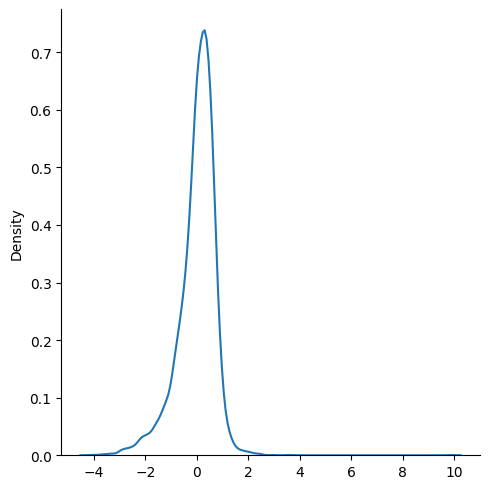

In [59]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [60]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score

0.3451339380943985

In [61]:
## Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [62]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-1.3400019579636542


In [63]:
lasso_pred=lassocv.predict(X_test)

In [64]:
lasso_pred=lassocv.predict(X_test)

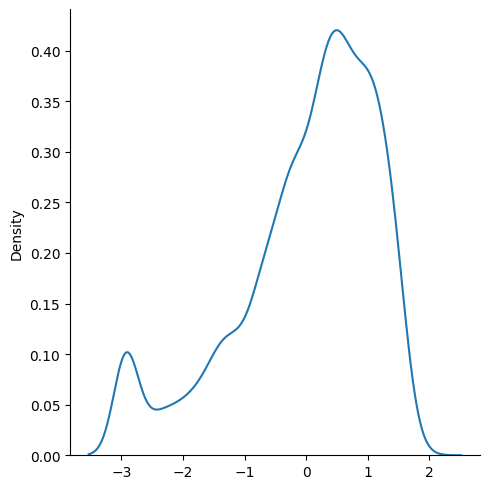

In [65]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')

In [66]:
from sklearn.metrics import r2_score
score=r2_score(lasso_pred,y_test)
score

0.0